In [74]:
Ryza_ships = [2, 2, 2.5, 2.5]

In [84]:
from itertools import combinations as comb
from math import prod

def get_all_in(drops, n):
    
    if n < len(drops): return 0
    not_drop = [1-x/100 for x in drops]
    total_probability = 1
    
    for i in range(1,len(not_drop)+1):
        
        pairs_of_i = list(comb(not_drop,i))
        
        probability = 0
        for j in pairs_of_i:
            probability += prod(j)**n
            
        total_probability += (-1)**i*probability
    
    return total_probability


def get_all_on(drops,n):
    return get_all_in(drops,n) - get_all_in(drops,n-1)

def avg_pulls(drops):
    for i in range(1000):
        if get_all_in(drops, i) > 0.5:
            return f"Average is {i} with {round(get_all_in(drops, i),5)} chance of getting all {len(drops)} shipgirls"

In [85]:
import matplotlib.pyplot as plt

def graph(drops):

    x = list(range(200+1))
    y = [get_all_in(drops,i) for i in x]
  
    plt.plot(x, y)
    plt.grid()
  
    plt.xlabel('No. of builds')
    plt.ylabel('')
    plt.title(f"Odds of getting all {len(drops)} Ryza ships")

    plt.show()
    
    print(f"\n{avg_pulls(drops)}\n")


    x = list(range(200+1))
    y = [get_all_on(drops,i) for i in x]

    plt.plot(x, y)
    plt.grid()
  
    plt.xlabel('Getting Last ship on n-th build')
    plt.ylabel('')
    plt.title(f"Max builds to get all {len(drops)} Ryza ships")
  
    plt.show()

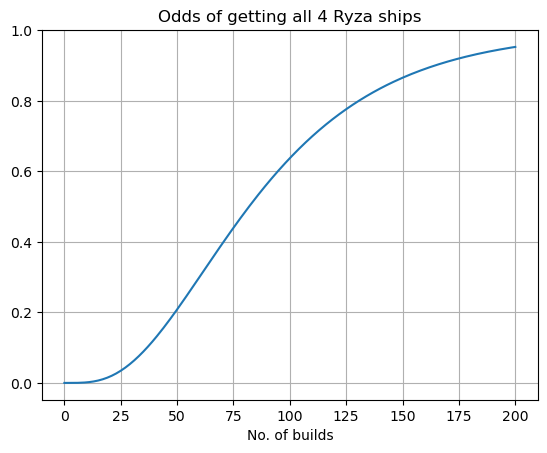


Average is 82 with 0.50087 chance of getting all 4 shipgirls



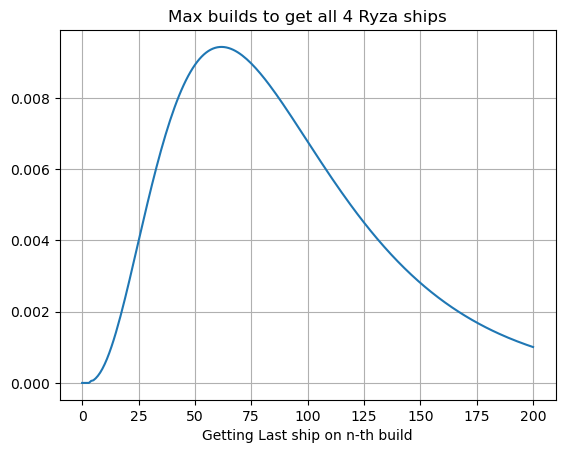

In [86]:
graph(Ryza_ships)